**Tema: Segmentación de clientes de un negocio de ventas online**

**Autor: Francisco Moyano Escalera**

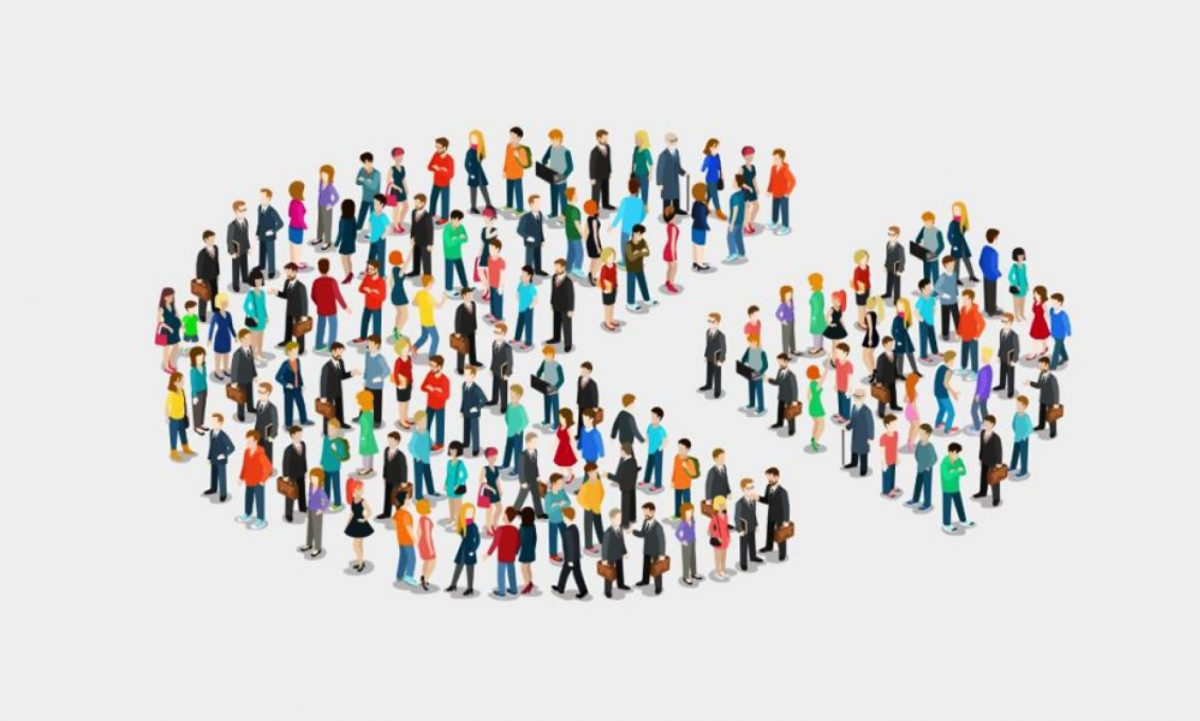

**1) Introducción**

 En el presente proyecto se hará foco en los clientes y su segmentación. ¿Por qué es importante semgmentar a los clientes? porque los clientes tienen diferentes necesidades, las cuales deben ser tenidas en cuenta al llevar a cabo acciones de marketing, es decir, no se puede tratar a todos los clientes de la misma manera con el mismo contenido, el mismo canal de comunicación, la misma importancia, de lo contrario se corre el riesgo de que encuentren otra opción en el mercado que los comprenda mejor.
 Se pueden llevar a cabo muchos tipos de segmentación, de acuerdo a lo que se esté queriendo lograr, por ejemplo si se desea aumentar la tasa de retención de los clientes se puede llevar a cabo una segmentación basada en la probabilidad de abandono y tomar las medidas necesarias. 
 En este proyecto se llevará a cabo una segmentación haciendo hincapié en tres métricas: 1) recencia: días transcurridos desde la última compra, 2) frecuencia: total de compras en el periodo de análisis, y 3) ingreso: hace referencia al ingreso que generan lo clientes para la empresa. El cálculo de estas métricas permitirá finalmente segmentar a los clientes en tres categorías:

**a) Bajo valor:** clientes que son poco activos, no son compradores muy frecuentes y generan ingresos muy bajos.

**b) Medio valor:** clientes que a menudo realizan compras (mas que los de bajo valor y menos que los de alto valor) y generan ingresos moderados.

**c) Alto valor:** es el grupo que más compras realiza y el que la empresa no quiere perder. Tienen alta frecuencia, generan altos ingresos, y cuentan con una baja inactividad.



**2) Objetivo**

Llevar a cabo una segmentación de los clientes en base a las métricas de frecuencia, recencia e ingreso generado.

**3) Fuente de datos**

La base de datos está compuesta por las siguientes columnas:
       
* InvoiceNo: número identificatorio único de cada operación.
* StockCode: número de stock al que pertenece el producto.
* Description: nombre del producto.      
* Quantity: cantidad vendida del producto.    
* InvoiceDate: fecha en que se genera la factura de compra.
* UnitPrice: precio unitario del producto.         
* CustomerID: número identificatorio único para cada cliente.        
* Country: país de procedencia del cliente.

**4) Adquisición de datos**

In [ ]:
# Se realiza la conexión con Google Drive, en donde se encuentra almacenada la base de datos:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Se importan las librerías a utilizar:
! pip install chart_studio
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta,date
from sklearn.cluster import KMeans


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Se importan las librerías a utilizar:
from __future__ import division
import chart_studio.plotly 
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
# Se carga la base de datos en un dataframe:
data = pd.read_excel("/content/drive/MyDrive/Proyectos/Marketing/Online Retail.xlsx")


In [ ]:
# Se imprime el encabezado del conjunto de datos:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Se observa en detalle los nombres de las columnas y los tipos de datos:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


El dataframe cuenta con 8 columnas, de las cuales tres son cuantitatitas ("Quantity", "UnitPrice" y "CustomerID"), una tipo date ("InvoiceDate") y las cuatro restantes son cualitativas.

**5) Limpieza y transformación de datos (Data Wrangling)**


In [ ]:
# Se determina si el dataframe tiene datos faltantes:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count() * 100)
percent.sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total Faltantes", "Porcentaje"])
missing_data

,Total Faltantes,Porcentaje
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


Existen dos columnas con valores nulos (NaN), sin embargo ninguna presenta un porcentaje alto de datos faltantes que obligue a eliminarlas.

In [ ]:
# Se analiza si el dataframe tiene datos duplicados:
duplicados = data.duplicated(keep= False) # Con keep=False se mantienen todos los duplicados
data[duplicados].sort_values(by="CustomerID") # Se ordenan las filas por Id para visualizar bien los duplicados

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
395388,571034,23239,SET OF 4 KNICK KNACK TINS POPPIES,6,2011-10-13 12:47:00,4.15,12359.0,Cyprus
395410,571034,23239,SET OF 4 KNICK KNACK TINS POPPIES,6,2011-10-13 12:47:00,4.15,12359.0,Cyprus
395442,571034,23494,VINTAGE DOILY DELUXE SEWING KIT,3,2011-10-13 12:47:00,5.95,12359.0,Cyprus
395443,571034,23494,VINTAGE DOILY DELUXE SEWING KIT,3,2011-10-13 12:47:00,5.95,12359.0,Cyprus
395455,571034,23245,SET OF 3 REGENCY CAKE TINS,4,2011-10-13 12:47:00,4.95,12359.0,Cyprus
...,...,...,...,...,...,...,...,...
424915,573290,23396,LE JARDIN BOTANIQUE CUSHION COVER,1,2011-10-28 14:51:00,3.75,NaN,Switzerland
483004,577489,23221,REINDEER HEART DECORATION SILVER,1,2011-11-20 12:07:00,0.83,NaN,United Kingdom
483010,577489,23221,REINDEER HEART DECORATION SILVER,1,2011-11-20 12:07:00,0.83,NaN,United Kingdom
514740,579744,23010,CIRCUS PARADE BABY GIFT SET,1,2011-11-30 14:38:00,16.95,NaN,United Kingdom


In [ ]:
# Se eliminan los registros duplicados: 
data.drop_duplicates(inplace= True)

In [ ]:
# Se modifican los nombres de las variables originales para facilitar el análisis:
data = data.rename(columns={"InvoiceNo": "N_Factura", 
                            "StockCode": "N_Stock",
                            "Description": "Descripcion",
                            "Quantity": "Cantidad",
                            "InvoiceDate": "F_Factura",
                            "UnitPrice": "Precio",
                            "CustomerID": "ID_Cliente",
                            "Country": "Pais"})
data.columns

Index(['N_Factura', 'N_Stock', 'Descripcion', 'Cantidad', 'F_Factura',
       'Precio', 'ID_Cliente', 'Pais'],
      dtype='object')

In [ ]:
# Se calcula la cantidad de productos vendidos agrupados por país: 
data.groupby("Pais")["Cantidad"].sum().sort_values(ascending=False).astype(int)

Pais
United Kingdom          4250328
Netherlands              200128
EIRE                     142495
Germany                  117341
France                   110438
Australia                 83643
Sweden                    35632
Switzerland               30313
Spain                     26817
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16153
Finland                   10666
Channel Islands            9473
Denmark                    8188
Italy                      7999
Cyprus                     6296
Singapore                  5234
Austria                    4827
Hong Kong                  4709
Israel                     4350
Poland                     3653
Unspecified                3295
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Cze

Dado que mas del 80% de las cantidad vendidas pertenecen al pais "United Kingdom" se trabajará directamente con un dataframe con estos datos.

In [ ]:
# Se crea un dataframe solo con los clientes del Reino Unido:
data_uk = data.query("Pais=='United Kingdom'").reset_index(drop=True)

**6) Cálculo de la Recencia**

Para calcular la Recencia es necesario definir la fecha de compra más reciente (es decir la fecha de la última compra) de cada cliente y así calcular cuantos fueron los días de inactividad.
Luego de obtener el número de días inactivos de cada cliente se utilizará el algoritmo de aprendizaje no supervisado K-means para asignar a cada uno una puntuación de Recencia. 

In [ ]:
# En primer lugar se crea un dataframe con cada uno de los Id de los clientes:
data_id = pd.DataFrame(data_uk["ID_Cliente"].unique())
data_id.columns = ["ID_Cliente"]
data_id.head()

,ID_Cliente
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


In [ ]:
# Se crea un dataframe con la última fecha de compra de cada cliente:
max_compra = data_uk.groupby("ID_Cliente").F_Factura.max().reset_index()
max_compra.columns = ["ID_Cliente","Ultima_Compra"]
max_compra.head()

,ID_Cliente,Ultima_Compra
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [ ]:
# Se obtiene la cantidad de días de inactividad desde la última compra:
max_compra["Recencia"] = (max_compra["Ultima_Compra"].max() - max_compra["Ultima_Compra"]).dt.days
# Se unen los dataframes
data_cliente = pd.merge(data_id, max_compra[["ID_Cliente","Recencia"]], on="ID_Cliente")
data_cliente.head()



,ID_Cliente,Recencia
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


In [ ]:
# Se observan las principales estadísticas descriptivas de la Recencia:
data_cliente.Recencia.describe().round()


count    3950.0
mean       91.0
std       100.0
min         0.0
25%        16.0
50%        49.0
75%       142.0
max       373.0
Name: Recencia, dtype: float64

Se observa que el promedio desde la última compra es de 91 días mientras que la mediana de días inactivos es 49.

In [ ]:
# Se realiza un histograma para analizar la distribución de la recencia de los clientes:
plot_data = [
    go.Histogram(
        x=data_cliente["Recencia"])]
plot_layout = go.Layout(
        title="Recencia")
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

El rango de inactivdad de 0-9 días y de 10-19 son los de mayor cantidad entre los clientes.

A continuación se desarrolla un modelo de K-Means para definir los grupos de recencia a los que pertenece cada cliente. Para determinar la cantidad de clusters se utilizará el método del codo.

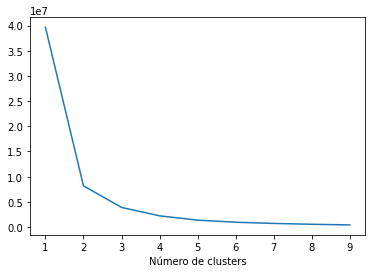

In [ ]:
# Se lleva a cabo un gráfico del codo para obtener el número óptimo de clusters:
sse={}
tx_recencia = data_cliente[["Recencia"]]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recencia)
    tx_recencia["Grupos"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.show()

La selección puede estar entre 3 y 4, en este caso se seleccionarán 4 grupos.

In [ ]:
# Se desarrolla el modelo K-Means para asignar los clientes a cada cluster de recencia:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_cliente[["Recencia"]])
data_cliente["Cluster_Recencia"] = kmeans.predict(data_cliente[["Recencia"]])

In [ ]:
# Se observa el encabezado del dataframe con la columna "Cluster_Recencia":
data_cliente.head()

,ID_Cliente,Recencia,Cluster_Recencia
0,17850.0,301,1
1,13047.0,31,3
2,13748.0,95,0
3,15100.0,329,1
4,15291.0,25,3


Se han calculado los grupos de recencia y se han asignado los clientes a cada uno.

In [ ]:
# Se analizan los valores de recencia para cada uno de los clusters:
data_cliente.groupby("Cluster_Recencia")["Recencia"].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster_Recencia,,,,,,,,
0,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0
1,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
2,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
3,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0


Se puede observar que los grupos/cluster no están ordenados (el cluster 0 es el que tendría que tener el valor promedio de inactividad más alto y el cluster 3 el mas bajo). A continuación se calcula una función para ordenar los grupos.

In [ ]:
# Se define una función para ordenar los grupos:
def cluster_ordenado(nombre_cluster, metrica,df,ascending):
    nombre_cluster_nuevo = 'new_' + nombre_cluster
    data = df.groupby(nombre_cluster)[metrica].mean().reset_index()
    data = data.sort_values(by=metrica,ascending=ascending).reset_index(drop=True)
    data['index'] = data.index
    df_final = pd.merge(df,data[[nombre_cluster,'index']], on=nombre_cluster)
    df_final = df_final.drop([nombre_cluster],axis=1)
    df_final = df_final.rename(columns={"index":nombre_cluster})
    return df_final

data_cliente = cluster_ordenado("Cluster_Recencia", "Recencia", data_cliente, False)


In [ ]:
# Se analizan los valores de recencia con los grupos ordenados:
data_cliente.groupby("Cluster_Recencia")["Recencia"].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster_Recencia,,,,,,,,
0,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
1,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
2,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0
3,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0


El grupo/cluster 3 es el que tiene menor actividad y el grupo 0 el de mayor cantidad de días promedio desde la última compra.

**7) Cálculo de la Frecuencia**

Para crear clusters en base a la frecuencia de compras, es necesario determinar el número total de compras de cada cliente en el periodo de análisis.

In [ ]:
# Se crea un dataframe con datos de la frecuencia de compras:
data_compras = data_uk.groupby("ID_Cliente").F_Factura.count().reset_index()
data_compras.columns = ["ID_Cliente","Frecuencia"]
# Se une con el dataframe que contiene los datos de recencia:
data_cliente = pd.merge(data_cliente, data_compras, on="ID_Cliente")

In [ ]:
# Se obsvera el dataframe con la columna "Frecuencia":
data_cliente.head()

,ID_Cliente,Recencia,Cluster_Recencia,Frecuencia
0,17850.0,301,0,309
1,15100.0,329,0,6
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1


Se observa la frecuencia de compra de cada cliente.

In [ ]:
# Se observan las principales estadísticas descriptivas de la frecuencia de compra:
data_cliente.Frecuencia.describe().round(0)


count    3950.0
mean       90.0
std       217.0
min         1.0
25%        17.0
50%        41.0
75%        99.0
max      7812.0
Name: Frecuencia, dtype: float64

El promedio de compras por cliente es 90 mientras que la mediana de compras es 41.

In [ ]:
# Se realiza un histograma para analizar la distribución de la frecuencia de compra de los clientes:
plot_data = [
    go.Histogram(
        x=data_cliente.query("Frecuencia < 1000")["Frecuencia"])] # Se incluyen valores de frecuencia menores a 1000 para facilitar la visualización
plot_layout = go.Layout(
        title="Frecuencia")
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Las cantidades de compras comprendidas entre 0-19 son las de mayor frecuencia.

In [ ]:
# Se desarrolla el modelo K-Means para asignar los clientes a cada cluster de frecuencia:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_cliente[["Frecuencia"]])
data_cliente["Cluster_Frecuencia"] = kmeans.predict(data_cliente[["Frecuencia"]])



In [ ]:
# Se observa el encabezado del dataframe con la columna "Cluster_Frecuencia":
data_cliente.head()

,ID_Cliente,Recencia,Cluster_Recencia,Frecuencia,Cluster_Frecuencia
0,17850.0,301,0,309,2
1,15808.0,305,0,197,2
2,13047.0,31,3,196,2
3,14688.0,7,3,356,2
4,16029.0,38,3,270,2


Se han calculado los grupos de frecuencia y se ha asignado a cada cliente a uno de los grupos.





In [ ]:
# Se observan los distintos clusters de frecuencia ordenados
# Se coloca ascending True para que ordene los valores de la media de menor a mayor:
data_cliente = cluster_ordenado("Cluster_Frecuencia", "Frecuencia", data_cliente,True) 
data_cliente.groupby("Cluster_Frecuencia")["Frecuencia"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_Frecuencia,,,,,,,,
0,3497.0,48.930798,44.240913,1.0,15.0,33.0,72.00,187.0
1,428.0,326.294393,131.375687,188.0,222.0,283.5,394.00,789.0
2,22.0,1298.363636,506.645320,849.0,968.0,1126.5,1429.25,2759.0
3,3.0,5799.666667,1774.543415,4459.0,4793.5,5128.0,6470.00,7812.0


El grupo/cluster 3 es el que tiene en promedio la mayor frecuencia de compras y el grupo 0 el de menor frecuencia. 

**8) Cálculo del Ingreso**

A continuación se agruparán los clientes en base a los ingresos que generaron a la empresa, siguiendo los mismos pasos anteriores.

In [ ]:
# Se calcula el ingreso que genera cada cliente:
data_uk["Ingreso"] = data_uk["Precio"] * data_uk["Cantidad"]
data_ingreso = data_uk.groupby("ID_Cliente").Ingreso.sum().reset_index()
# Se unen los dataframes
data_cliente = pd.merge(data_cliente, data_ingreso, on="ID_Cliente")

In [ ]:
# Se obsvera el dataframe con la columna "Ingreso":
data_cliente.head()

,ID_Cliente,Recencia,Cluster_Recencia,Frecuencia,Cluster_Frecuencia,Ingreso
0,17850.0,301,0,309,1,5303.48
1,15808.0,305,0,197,1,3641.07
2,13047.0,31,3,196,1,3079.10
3,14688.0,7,3,356,1,5055.61
4,16029.0,38,3,270,1,53168.69


Se observa el ingreso generado por cada cliente.

In [ ]:
# Se observan las principales estadísticas descriptivas del ingreso:
data_cliente.Ingreso.describe().round(0)

count      3950.0
mean       1708.0
std        6549.0
min       -4288.0
25%         281.0
50%         623.0
75%        1518.0
max      256438.0
Name: Ingreso, dtype: float64

El ingreso promedio generado por cliente es de 1798 mientras que la mediana es es 623.

In [ ]:
# Se realiza un histograma para analizar la distribución de los ingresos de los clientes:
plot_data = [
    go.Histogram(x=data_cliente.query("Ingreso < 10000")["Ingreso"])] # Se incluyen valores de ingresos menores a 1000 para facilitar la visualización
plot_layout = go.Layout(
        title="Ingreso")
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Los ingresos entre 200 y 400 son los de mayor frecuencia., a su vez se observa que hay algunos clientes que no generaron ingresos y otros que generaron ingresos negativos.

In [ ]:
# Se desarrolla el modelo K-Means para asignar los clientes a cada cluster de ingreso:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_cliente[["Ingreso"]])
data_cliente["Cluster_Ingreso"] = kmeans.predict(data_cliente[["Ingreso"]])

In [ ]:
# Se observa el dataframe con la columna "Cluster_Ingreso":
data_cliente.head()

,ID_Cliente,Recencia,Cluster_Recencia,Frecuencia,Cluster_Frecuencia,Ingreso,Cluster_Ingreso
0,17850.0,301,0,309,1,5303.48,0
1,15808.0,305,0,197,1,3641.07,0
2,13047.0,31,3,196,1,3079.10,0
3,14688.0,7,3,356,1,5055.61,0
4,16029.0,38,3,270,1,53168.69,2


Se han calculado los grupos por ingreso y se han asignados a los clientes a cada uno.

In [ ]:
# Se observan los distintos clusters de ingreso ordenados
# Se coloca ascending True para que ordene los valores de la media de menor a mayor:
data_cliente = cluster_ordenado("Cluster_Ingreso", "Ingreso", data_cliente,True)
data_cliente.groupby("Cluster_Ingreso")["Ingreso"].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster_Ingreso,,,,,,,,
0,3755.0,973.431258,1049.663022,-4287.63,266.495,584.060,1313.585,5312.97
1,174.0,9787.175057,5286.787858,5356.86,6320.495,7792.435,10881.815,28658.88
2,19.0,49746.982105,14576.171999,31300.08,35079.280,51823.720,57221.520,88125.38
3,2.0,221880.330000,48872.618563,187322.17,204601.250,221880.330,239159.410,256438.49


Los clientes del cluster 3 son los que en promedio generan mayor ingreso a la empresa, y está compuesto por dos integrantes, mientras que el grupo 0 es el que menos ingresos genera y el que con más integrantes cuenta.

**9) Definición de los Segmentos**

Se han creado los clusters para la resencia, frecuencia e ingresos. A continuación se va definir un puntaje para cada uno de los clientes en base a los clusters a los cuales pertenecen, para poder finalmente asignar a cada cliente un valor.


In [ ]:
# Se calcula el puntaje  de cada cliente en base a su recencia, frecuencia e ingreso generado:
data_cliente["Puntaje"] = data_cliente["Cluster_Recencia"] + data_cliente["Cluster_Frecuencia"] + data_cliente["Cluster_Ingreso"]
# Se observa el dataframe con la columna "Puntaje":
data_cliente.head()

,ID_Cliente,Recencia,Cluster_Recencia,Frecuencia,Cluster_Frecuencia,Ingreso,Cluster_Ingreso,Puntaje
0,17850.0,301,0,309,1,5303.48,0,1
1,15808.0,305,0,197,1,3641.07,0,1
2,13047.0,31,3,196,1,3079.10,0,4
3,14688.0,7,3,356,1,5055.61,0,4
4,13448.0,16,3,198,1,3460.99,0,4


In [ ]:
# Se agrupa por la columna  puntaje y se calcula la media de cada una de las métricas:
data_cliente.groupby("Puntaje")["Recencia","Frecuencia", "Ingreso"].mean()

,Recencia,Frecuencia,Ingreso
Puntaje,,,
0,304.480000,21.637895,310.470105
1,185.444840,32.645907,497.548044
2,78.676823,46.039173,866.139915
3,20.676643,68.922576,1137.372480
4,14.112540,279.437299,3823.291576
5,9.564103,417.136752,10646.558547
6,5.900000,946.000000,25824.771000
7,1.857143,1755.571429,103965.765714
8,2.000000,6470.000000,48494.980000


A continuación se categorizan los puntajes obtenidos en tres segmentos/niveles:

* De 0 a 2: valor bajo

* De 3 a 4: valor medio

* 5 o más: valor alto

In [ ]:
# Se calculan los tres niveles de acuerdo al puntaje:
data_cliente["Segmento"] = "Valor-Bajo"
data_cliente.loc[data_cliente["Puntaje"]>2,"Segmento"] = "Valor-Medio"
data_cliente.loc[data_cliente["Puntaje"]>4,"Segmento"] = "Valor-Alto"
# Se observa como queda el dataframe con la columna "Segmento":
data_cliente.head()

,ID_Cliente,Recencia,Cluster_Recencia,Frecuencia,Cluster_Frecuencia,Ingreso,Cluster_Ingreso,Puntaje,Segmento
0,17850.0,301,0,309,1,5303.48,0,1,Valor-Bajo
1,15808.0,305,0,197,1,3641.07,0,1,Valor-Bajo
2,13047.0,31,3,196,1,3079.10,0,4,Valor-Medio
3,14688.0,7,3,356,1,5055.61,0,4,Valor-Medio
4,13448.0,16,3,198,1,3460.99,0,4,Valor-Medio


In [ ]:
# Se agrupa por la columna segmento y se calcula la media de cada una de las métricas:
data_cliente.groupby("Segmento")["Recencia","Frecuencia", "Ingreso"].mean().sort_values(by="Recencia", ascending=True)

,Recencia,Frecuencia,Ingreso
Segmento,,,
Valor-Alto,8.589041,636.671233,17718.445822
Valor-Medio,19.571970,104.350108,1589.385920
Valor-Bajo,164.188139,36.265337,625.295441


La agrupación muestra claramente que los clientes pertenecientes al segmento "Valor-Alto" cuentan en promedio con el valor mas bajo de recencia, mas alto de frecuencia y mas alto de ingreso., los clientes pertenecientes al segmento "Valor-Medio" cuentan en promeido con el segundo valor mas bajo de recencia, el segundo valor mas alto de frecuencia y el segundo valor mas alto de ingreso., por último los clientes del segmento "Valor-Bajo" cuentan con el valor de recencia mas alto, y los niveles de frecuencia e ingreso mas bajos.



Por último se observa como se distribuyen los segmentos en diagramas de relación de dos variables.

In [ ]:
# Se grafica la relación entre Frecuencia e Ingreso, para cada uno de los tres segmentos:

tx_graph = data_cliente.query("Ingreso < 50000 and Frecuencia < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Bajo'")["Frecuencia"],
        y=tx_graph.query("Segmento == 'Valor-Bajo'")["Ingreso"],
        mode="markers",
        name="Bajo",
        marker= dict(size= 7,
            line= dict(width=1),
            color= "blue",
            opacity= 0.8)),
        go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Medio'")["Frecuencia"],
        y=tx_graph.query("Segmento == 'Valor-Medio'")["Ingreso"],
        mode="markers",
        name="Medio",
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5 )),
        go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Alto'")["Frecuencia"],
        y=tx_graph.query("Segmento == 'Valor-Alto'")["Ingreso"],
        mode='markers',
        name="Alto",
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9 )),]

plot_layout = go.Layout(
        yaxis= {"title": "Ingreso"},
        xaxis= {"title": "Frecuencia"},
        title="Segmentos")
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Se corrobora mediante el gráfico que los clientes con valor bajo tienen en promedio baja frecuencia y bajo ingreso. 

In [ ]:
# Se grafica la relación entre Recencia e Ingreso, para cada uno de los tres segmentos:

tx_graph = data_cliente.query("Ingreso < 50000 and Recencia < 1000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Bajo'")["Recencia"],
        y=tx_graph.query("Segmento == 'Valor-Bajo'")["Ingreso"],
        mode="markers",
        name="Bajo",
        marker= dict(size= 7,
            line= dict(width=1),
            color= "blue",
            opacity= 0.8)),
        go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Medio'")["Recencia"],
        y=tx_graph.query("Segmento == 'Valor-Medio'")["Ingreso"],
        mode="markers",
        name="Medio",
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5 )),
        go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Alto'")["Recencia"],
        y=tx_graph.query("Segmento == 'Valor-Alto'")["Ingreso"],
        mode='markers',
        name="Alto",
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9 )),]

plot_layout = go.Layout(
        yaxis= {"title": "Ingreso"},
        xaxis= {"title": "Recencia"},
        title="Segmentos" )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


Se corrobora mediante el gráfico que los clientes con valor alto tienen baja recencia y alto ingreso. 

In [ ]:
# Se grafica la relación entre Recencia Y Frecuencia, para cada uno de los tres segmentos:

tx_graph = data_cliente.query("Frecuencia < 2000 and Recencia < 1000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Bajo'")["Recencia"],
        y=tx_graph.query("Segmento == 'Valor-Bajo'")["Frecuencia"],
        mode="markers",
        name="Bajo",
        marker= dict(size= 7,
            line= dict(width=1),
            color= "blue",
            opacity= 0.8)),
        go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Medio'")["Recencia"],
        y=tx_graph.query("Segmento == 'Valor-Medio'")["Frecuencia"],
        mode="markers",
        name="Medio",
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5 )),
        go.Scatter(
        x=tx_graph.query("Segmento == 'Valor-Alto'")["Recencia"],
        y=tx_graph.query("Segmento == 'Valor-Alto'")["Frecuencia"],
        mode='markers',
        name="Alto",
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9 )),]

plot_layout = go.Layout(
        yaxis= {"title": "Frecuencia"},
        xaxis= {"title": "Recencia"},
        title="Segmentos" )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Se corrobora mediante el gráfico que los clientes con valor intermedio tienen valores intermedios de frecuencia y valores intermedios de recencia.

**10) Conclusión:**

Se puede ver cómo los segmentos de valor de clientes están claramente diferenciados entre sí en términos de su recencia/frecuencia/ingresos. Se puede comenzar a tomar acciones en base a la segmentación, algunas estrategias a seguir pueden ser:

1) Para clientes de valor alto: tomar medidas para mejorar la retención.

2) Para clintes de valor medio: tomar medidas para mejorar la retención y aumentar la frecuencia.

3) Para clientes de valor bajo: tomar medidas para aumentar la frecuencia.
